# Evolutionary computation 
# Exercise 1

Genotype is array (size 8)  
Population: 100  
Mutation probability: 0.1%    
Crossover probability: 70%  
Terminal conditions: 100 generations  
Operators:  
Crossover: Single point crossover    
Mutation: One point mutation  
Selection: Roulette-wheel sampling  


Algorithms time 0.9804515838623047


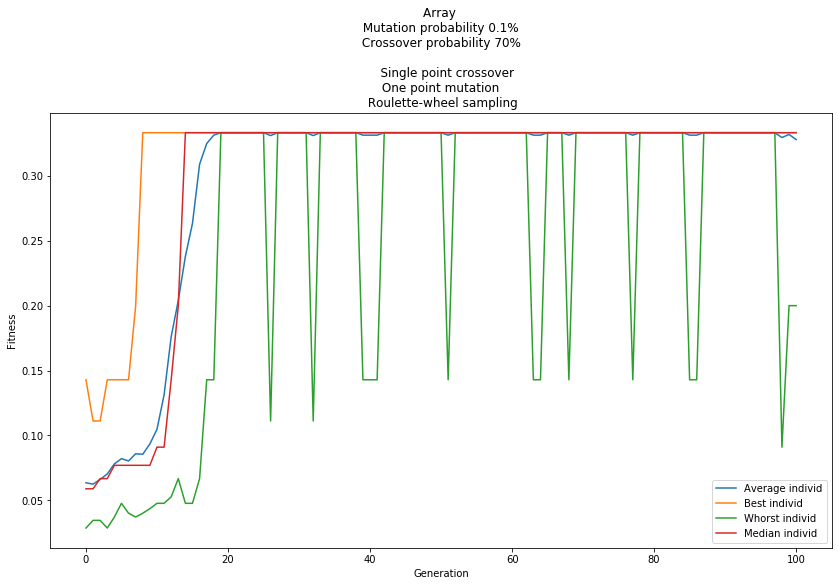

In [4]:
import random
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import time
import matplotlib.pyplot as plt

# __________Number_Queens_____________
queens = 8


# __________Fitness_Function_____________
def evaluation(individual):
    size = len(individual)
    sum = 0
    for i in range(size):
        for j in range(i+1, size):
            if individual[i] == individual[j]:
                sum += 2
            elif abs(individual[i] - individual[j])==abs(i-j):
                sum += 2           
    return 1/(1+sum),

# __________Mutation_One_Point_____________
def mut_one_point(individual): 
    index=random.sample(range(len(individual)),1)[0]
    variation=[x for x in range(len(individual)) if x!=individual[index]]
    (individual[index])=random.sample(variation,1)[0]
    return (individual,)

# __________MAIN_____________

def evoluation(queens):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()

    toolbox.register("array", random.randrange, start=0, stop=queens)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.array, n=queens)

    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluation)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", mut_one_point)
    toolbox.register("select", tools.selRoulette)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("Average", numpy.mean)
    stats.register("Median", numpy.median)
    stats.register("Min", numpy.min)
    stats.register("Max", numpy.max)

    before = time.time()
    a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.001, ngen=100, stats=stats,
                                halloffame=hof, verbose=False)
    after=time.time() 
    avg=v.select("Average")
    md=v.select("Median")
    mn=v.select("Min")
    mx=v.select("Max")
    gen=v.select("gen")
    print('Algorithms time',after-before)
    
    # __________Visualization_____________
    fig, ax = plt.subplots(figsize = (14, 8))
    line_avg = ax.plot(gen, avg, label='Average individ')
    line_max = ax.plot(gen, mx, label='Best individ')
    line_min = ax.plot(gen, mn, label='Whorst individ')
    line_md = ax.plot(gen, md, label='Median individ')
    ax.legend()
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    ax.set_title('''Array \n Mutation probability 0.1% \n Crossover probability 70% \n  
    Single point crossover \n One point mutation \n Roulette-wheel sampling''')
    plt.show()
    
evoluation(queens)